In [81]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [82]:
#loading data

df = pd.read_csv('tn.movie_budgets.csv')

In [83]:
#dataset exploration
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [84]:
df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data information shows that there are no missing values.

In [86]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    df[x] = df[x].astype(str).replace({'\$':'',',':''},regex = True)
    df[x] = df[x].astype(float)
    df[x] = df[x].round(0).astype(int)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [87]:
#check for duplicates

df.duplicated().sum()

0

There are no duplicated entries

In [88]:
#dropping rows where gross revenue is 0

df = df[df['worldwide_gross'] != 0]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [89]:
#checking for outliers using the interquartile range
for x in currency_cols:
    Q1 = df[x].quantile(0.25)  
    Q3 = df[x].quantile(0.75)  
    IQR = Q3 - Q1  

    #outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #outliers
    outliers = df[(df[x] < lower_bound) | (df[x] > upper_bound)]
outliers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
...,...,...,...,...,...,...
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806
4567,68,"Dec 15, 1939",Gone with the Wind,3900000,198680470,390525192
4589,90,"Aug 13, 1997",The Full Monty,3500000,45950122,261249383
4775,76,"Feb 15, 1950",Cinderella,2900000,85000000,263591415


In [90]:
for x in currency_cols:
    df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
61,62,"Jun 17, 2011",Green Lantern,200000000,116601172,219535492
65,66,"Mar 1, 2013",Jack the Giant Slayer,195000000,65187603,197687603
88,89,"Nov 23, 2011",Hugo,180000000,73864507,180047784
89,90,"Jul 21, 2017",Valerian and the City of a Thousand Planets,180000000,40479370,215098356
90,91,"Feb 6, 2015",Jupiter Ascending,179000000,47482519,181982519
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


###DROP OUTLIERS OR NO

In [91]:
#calculating the profit margins for each movie
df['profit ($)'] = ((df['worldwide_gross'] - df['production_budget'])/df['production_budget']).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit ($)
61,62,"Jun 17, 2011",Green Lantern,200000000,116601172,219535492,0
65,66,"Mar 1, 2013",Jack the Giant Slayer,195000000,65187603,197687603,0
88,89,"Nov 23, 2011",Hugo,180000000,73864507,180047784,0
89,90,"Jul 21, 2017",Valerian and the City of a Thousand Planets,180000000,40479370,215098356,0
90,91,"Feb 6, 2015",Jupiter Ascending,179000000,47482519,181982519,0
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,9
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495,39
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0


In [92]:
#calculating the return of investment for each movie
df['r_o_i %'] = (((df['profit ($)'] - df['production_budget'])/df['production_budget'])*100).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit ($),r_o_i %
61,62,"Jun 17, 2011",Green Lantern,200000000,116601172,219535492,0,-100
65,66,"Mar 1, 2013",Jack the Giant Slayer,195000000,65187603,197687603,0,-100
88,89,"Nov 23, 2011",Hugo,180000000,73864507,180047784,0,-100
89,90,"Jul 21, 2017",Valerian and the City of a Thousand Planets,180000000,40479370,215098356,0,-100
90,91,"Feb 6, 2015",Jupiter Ascending,179000000,47482519,181982519,0,-100
...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,9,-99
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0,-100
5778,79,"Apr 2, 1999",Following,6000,48482,240495,39,-99
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-100


In [93]:
#sorting data from the highest return on investment
df = df.sort_values(by='profit ($)', ascending=False)
df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit ($),r_o_i %
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1799,-92
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,497,-99
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,430,-99
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,415,-99
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,412,-99
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,341,-99
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,290,-95
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,262,-99
5210,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,224,-99
5536,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,214,-99


In [94]:
#changing the date column to datetime

df['release_date'] = pd.to_datetime(df['release_date']) 

#extracting the year into its own column
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit ($),r_o_i %,year,month
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,1799,-92,1972,6
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,497,-99,1980,3
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,430,-99,2009,9
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,415,-99,2015,7
5406,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,412,-99,1999,7
...,...,...,...,...,...,...,...,...,...,...
2737,38,2018-11-02,Nobodyâs Fool,19000000,31713110,32589493,0,-100,2018,11
2739,40,2010-01-08,Leap Year,19000000,25918920,32618920,0,-100,2010,1
2741,42,2007-10-19,"Gone, Baby, Gone",19000000,20300218,34352162,0,-100,2007,10
2742,43,2000-07-26,Thomas and the Magic Railroad,19000000,15911332,15911332,0,-100,2000,7


In [95]:
#how has the movie industry been doing over the years using a function

def plot_timeseries(col_name):
    time_series = df.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=time_series, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

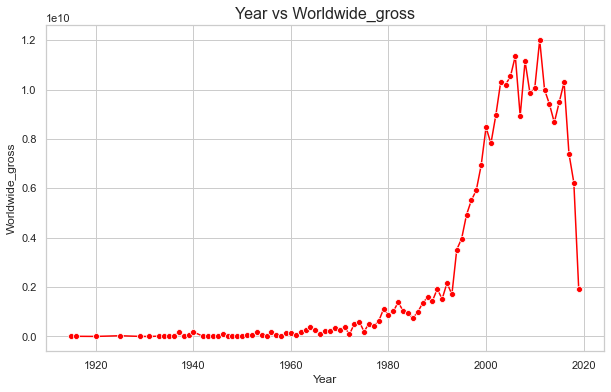

In [96]:
#time series based on worldwide_gross
plot_timeseries('worldwide_gross')

From the above visualisation, we can see that the movie industry peaked worldwide from the 1990s, and a sudden drop in around 2018-2020

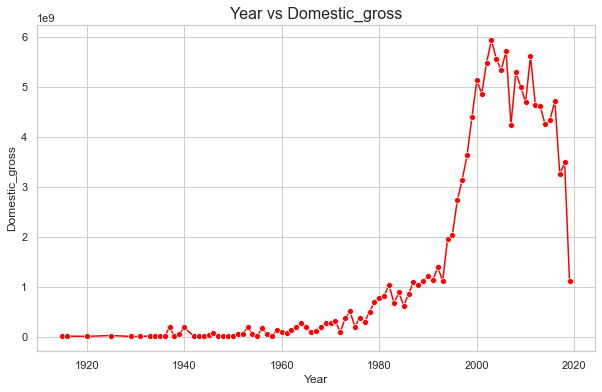

In [97]:
#time series based on domestic_gross
plot_timeseries('domestic_gross')

We observe a similar trend in the domestic market as to the worldwide market.

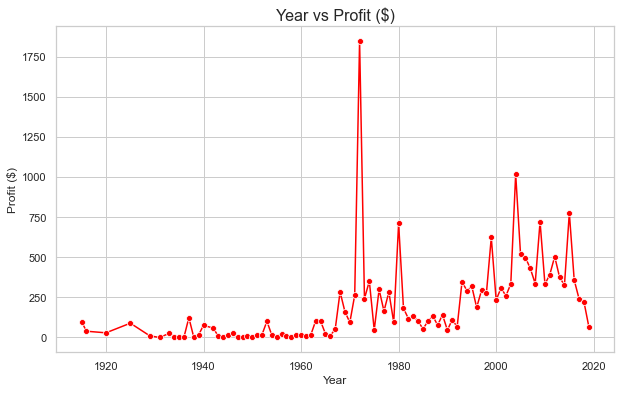

In [98]:
#time series based on r_o_i
plot_timeseries('profit ($)')

From the time series using return on investment, we can observe a sudden peak around the 1970, and a gradual increasing trend from 1990s to later in the decade 2010-2020.

From the above plots, is it safe to say that the way the domestic market behaves mirrors how the worldwide market will behave? Using a simple linear regression to see the relationship between the domestic gross and the worlwide gross:

In [99]:
#defining variables

X = df[['domestic_gross']]
y = df['worldwide_gross']

In [100]:
#adding constant

model = sm.OLS(endog = y, exog = sm.add_constant(X))

In [101]:
#fitting

results = model.fit()

In [102]:
#evaluation of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.639e+04
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:05:17   Log-Likelihood:                -90086.
No. Observations:                4850   AIC:                         1.802e+05
Df Residuals:                    4848   BIC:                         1.802e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.592e+06   5.37e+05      8.

Interpretation of the simple regression:
1. R-squared = 0.772 meaning that the variance of the worldwide gross can be explained by the domestic gross 77% of the time.
2. p-value = 0.00 which is less than 0.05 meaning that the model is statistically significant. Domestic gross can significantly predict worldwide gross
3. constant = 4.592e+06 means When domestic gross is 0, estimated value of the worldwide gross is $4,592,000
4. coef = 1.6641 suggests that for every unit increase in the domestic gross, worldwide gross increases by 1.6641 units.

From the above, we can note that higher domestic gross is associated with higher worldwide gross.

Can we attribute the remaining 23% of the variance of the worldwide gross to either budgets or the year they were released? Using a multiple linear regression:

In [103]:
#defining variables

X1 = df[['domestic_gross','production_budget','year']]
y1 = df['worldwide_gross']

In [104]:
#adding constant

model = sm.OLS(endog = y1, exog = sm.add_constant(X1))

In [105]:
#fitting

results1 = model.fit()

In [106]:
#evaluation of the results
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     7179.
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:05:18   Log-Likelihood:                -89559.
No. Observations:                4850   AIC:                         1.791e+05
Df Residuals:                    4846   BIC:                         1.792e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.533e+08   5.84e+0

Interpretation of the above:
1. R-squared = 0.816 meaning that the variance of the worldwide gross can be explained by the domestic gross,production budget and the year the movie was released 81.6% of the time.
2. p-value = 0.00 which is less than 0.05 meaning that the model is statistically significant. Atleast one can significantly predict worldwide gross
3. constant = -6.533e+0 means when all predictors are 0, estimated value of the worldwide gross is negative.
4. domestic gross coef = 1.4688 suggests that for every unit increase in the domestic gross, worldwide gross increases by 1.4688 units holding others constant.
5. production budget coef = 0.4817 meaning that for every unit increase in the production budget, worldwide gross increases by 0.4817 units holding others constant.
6. year coef = 3.25e+05 meaning that for every unit increase in the year, worldwide gross increases by $325,200  holding others constant.

From the above, we can note that higher domestic gross is the most important factor to predict worlwide gross.
The effect of year is smaller compared to domestic gross and production budget. This indicates that movies made in more recent years tend to earn slightly more, possibly due to inflation or increased global demand.
****** HOW MUCH CAN HE INVEST TO GET ATLEAST RETURN ON INVESTMENT AND IN WHAT

Are there any specific months where the industry performs well?


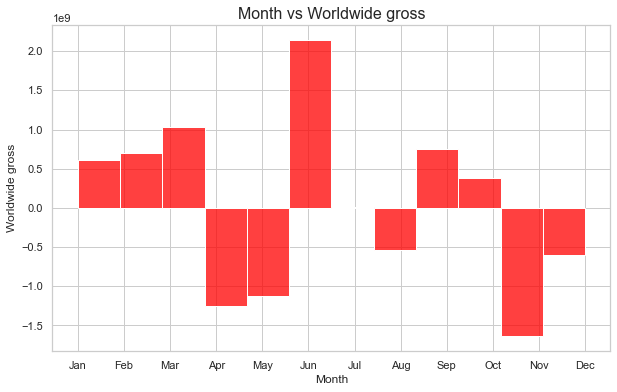

In [112]:
plt.figure(figsize = (10, 6))
sns.histplot(data=df, x='month', weights='worldwide_gross', bins = 12, color = 'red')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Month vs Worldwide gross', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Worldwide gross', fontsize=12)
plt.grid(True)
plt.show()